# Image processing solution

### Original photo upload and visualisation:

In [1]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

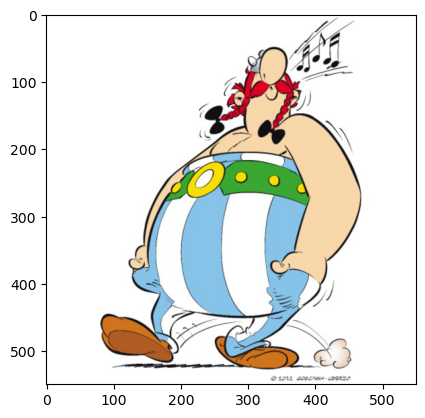

In [3]:
myphoto = 'obelix.jpg'

# Current working directory as absolute path
current_dir = os.getcwd()

# Relative path to a file in the current directory
loc_input_img = os.path.join(current_dir, myphoto)

image = Image.open(loc_input_img)

np_image = np.array(image)

plt.imshow(np_image)
plt.show()

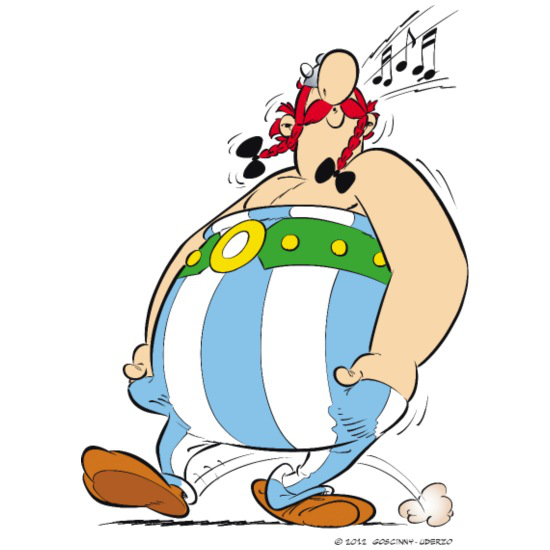

In [4]:
img = 'obelix.jpg'

with PIL.Image.open(img) as im:
    display(im)

In [5]:
arr_im = np.array(im)
print(arr_im.shape)

(550, 550, 3)


### First manipulation: 

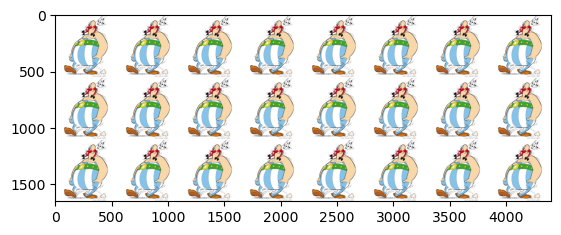

In [6]:
# Set dimension of copy  
copies = (3, 8, 1)  

# Use of np.tile to create new image with multiple copies
copy_image = np.tile(arr_im, copies)

# Visualisation
plt.imshow(copy_image)
plt.show()

### Second manipulation:

In [17]:
flip_im_H = np.flip(im,1)
flip_im_V_orig = np.flipud(im)
flip_im_V_flip = np.flipud(flip_im_H)

In [8]:
# Set dimension of copy 
copies = (1, 6, 1)  

# Use of np.tile to create new image with multiple copies
copy_image = np.tile(im, copies)
copy_image_H = np.tile(flip_im_H, copies)
copy_image_V = np.tile(flip_im_V_orig, copies)
copy_image_V_flip = np.tile(flip_im_V_flip, copies)

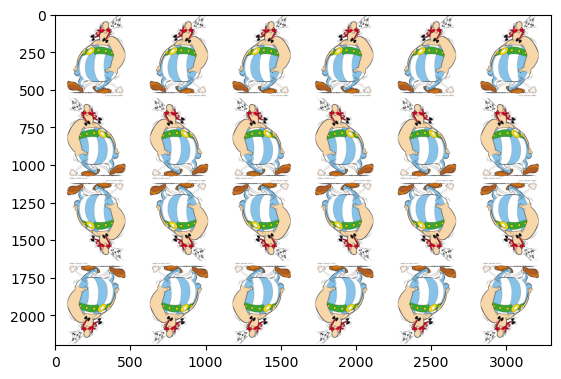

In [9]:
# Use of concatenate to combine multiple flipped images
 
full_image = np.concatenate((copy_image, copy_image_H, copy_image_V, copy_image_V_flip), axis=0)

# Visualisation

plt.imshow(full_image)
plt.show()

### Third manipulation:

In [10]:
# Copying the original image array to create independent copies for multiple colour manipulation

red_im = arr_im.copy()

# Setting all values in the blue and green color channels to zero
red_im[:,:,[1,2]] = 0

blue_im = arr_im.copy()
# Setting all values in the red and green color channels to zero
blue_im[:,:,[0,1]] = 0

green_im = arr_im.copy()
# Setting all values in the red and blue color channels to zero
green_im[:,:,[0,2]] = 0

In [11]:
# Set dimension of copy  
copies = (1, 4, 1)  

# Use of np.tile to create new images per colour with multiple copies

copy_image_green = np.tile(green_im, copies)
copy_image_blue = np.tile(blue_im, copies)
copy_image_red = np.tile(red_im, copies)


(2200, 2200, 3)


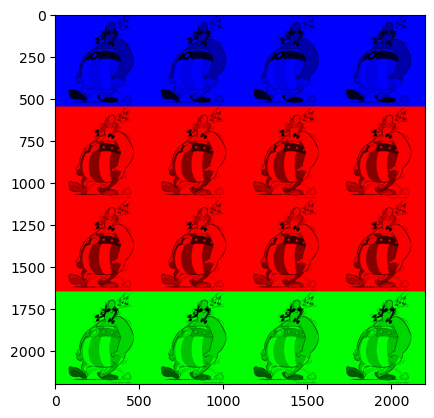

In [18]:
# Use of concatenate to combine multiple coloured images
colour_image = np.concatenate((copy_image_blue, copy_image_red, copy_image_red, copy_image_green), axis=0)

print(colour_image.shape) 

plt.imshow(colour_image)
plt.show()

In [19]:
print(arr_im.shape)
print(colour_image.shape)

(550, 550, 3)
(2200, 2200, 3)


### Forth manipulation:

In [20]:
# Create Image objects from NumPy arrays
base_image = Image.fromarray(colour_image)
overlay_image = Image.fromarray(arr_im) 

In [24]:
# Define the position where the overlay will be pasted on the base image
overlay_position = (550, 550)

# Define the width and height for the resized overlay
overlay_width, overlay_height = 1100, 1100

# Resize the overlay image to the specified width and height
resized_overlay = overlay_image.resize((overlay_width, overlay_height))

# Convert both base and resized overlay images to RGBA mode for handling transparency
base_image = base_image.convert("RGBA")
resized_overlay = resized_overlay.convert("RGBA")

# Create a copy of the base image to preserve the original
result_image = base_image.copy()

# Paste the resized overlay onto the result image at the specified position
# The 'resized_overlay' argument is used as the transparency mask
result_image.paste(resized_overlay, overlay_position, resized_overlay)

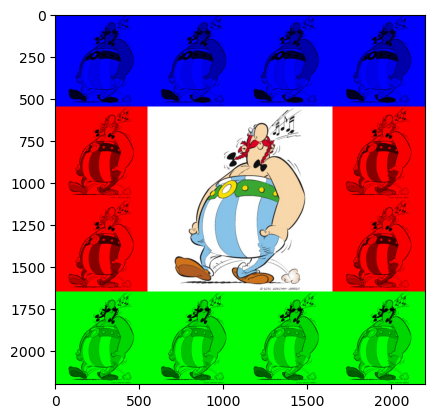

In [25]:
arr_result_image = np.array(result_image)

#Visualization
plt.imshow(arr_result_image)
plt.show()

### Additional manipulation 1:

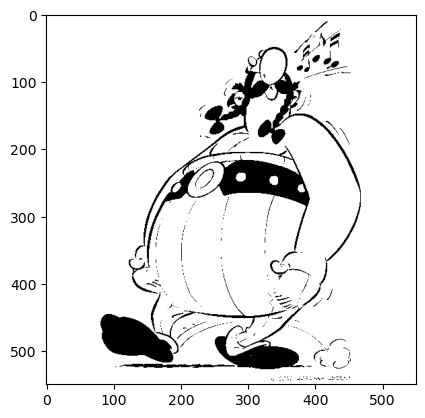

In [23]:
#Create a black and white image from original image:

f_bw = np_image.copy()
f_bw = f_bw.astype(float)

# Sum the color channels along the third axis to obtain a grayscale image
f_bw = f_bw.sum(axis=2)

# Normalize the pixel values to the range [0, 1]
f_bw /= f_bw.max()
f_bw = np.round(f_bw)

# Display the grayscale image using the 'gray' colormap
plt.imshow(f_bw, cmap=plt.cm.gray)
plt.show()

### Additional manipulation 2:

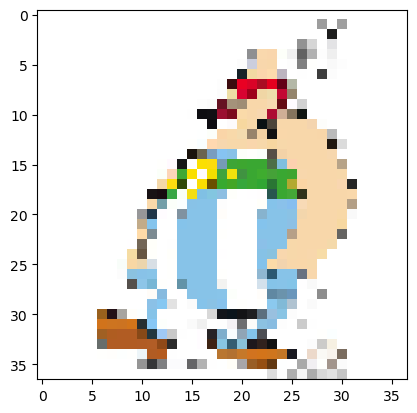

In [8]:
# Downsampling of image to reduce the pixels for blurring:
plt.imshow(np_image[::15, ::15, :])
plt.show()